# Your First Deep Learning Project in Python with Keras Step-by-Step

by Jason Brownlee on August 16, 2022 in Deep Learning

https://machinelearningmastery.com/tutorial-first-neural-network-python-keras/

In [1]:
# first neural network with keras tutorial
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
import pandas as pd

2024-04-02 13:40:41.562244: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-02 13:40:41.565540: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-02 13:40:41.607008: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-02 13:40:42.367049: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
# load the dataset
dataset = pd.read_csv("./diabetes.csv")
dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
positive = dataset[dataset["Outcome"]==1]
negative = dataset[dataset["Outcome"]==0]

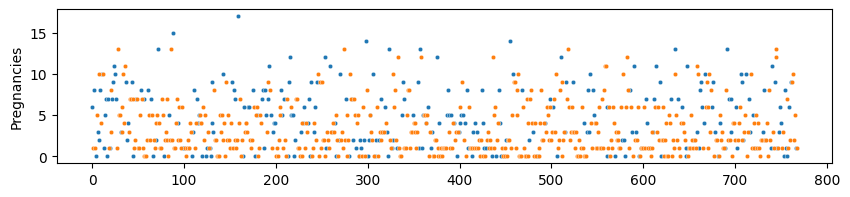

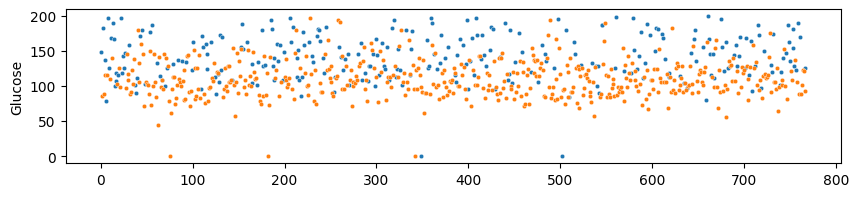

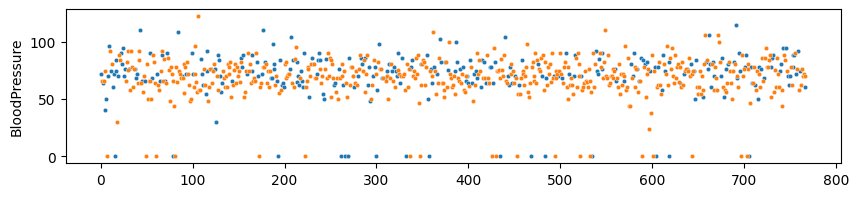

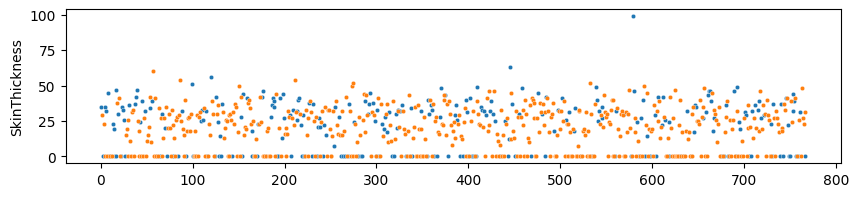

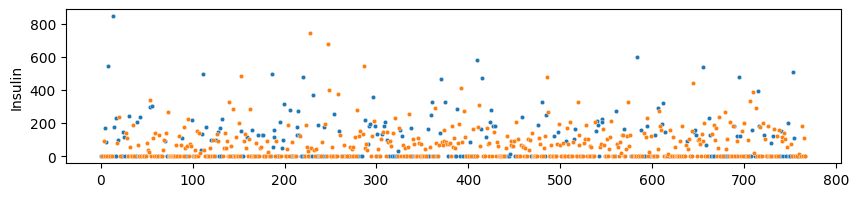

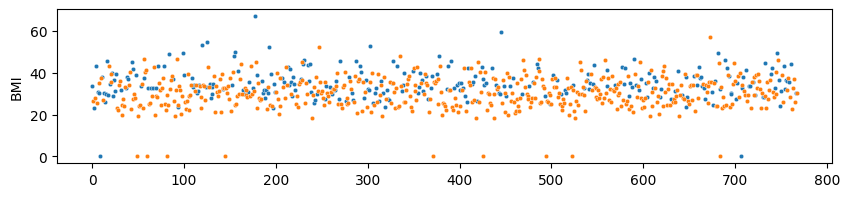

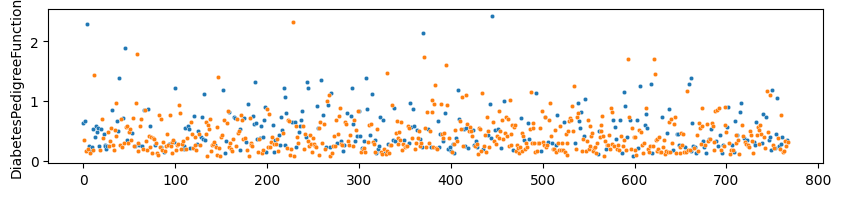

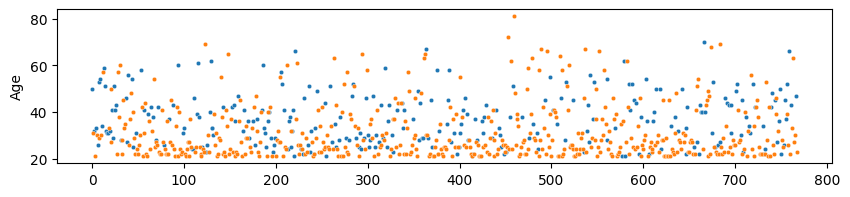

In [4]:
import seaborn as sns

dot_size = 10
for col in dataset.drop("Outcome", axis=1).columns:
    plt.figure(figsize=(10, 2))
    sns.scatterplot(positive[col], s=dot_size)
    sns.scatterplot(negative[col], s=dot_size)
    plt.show()

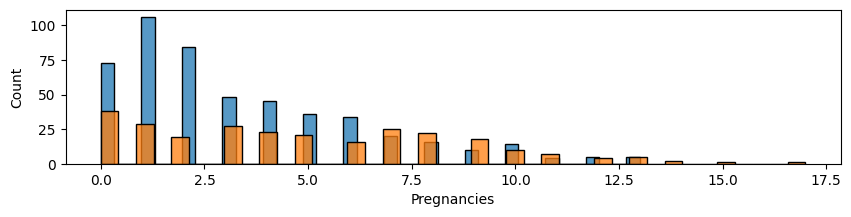

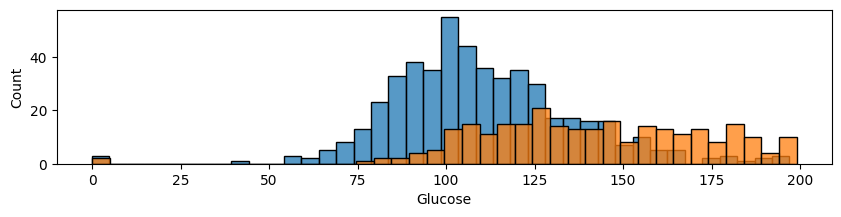

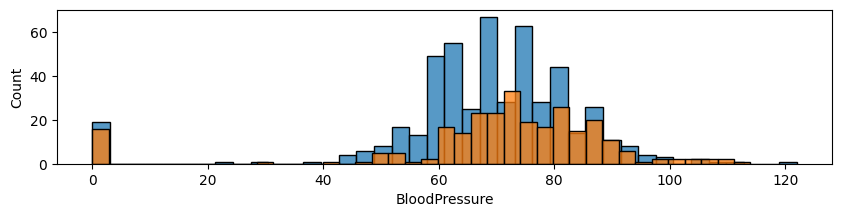

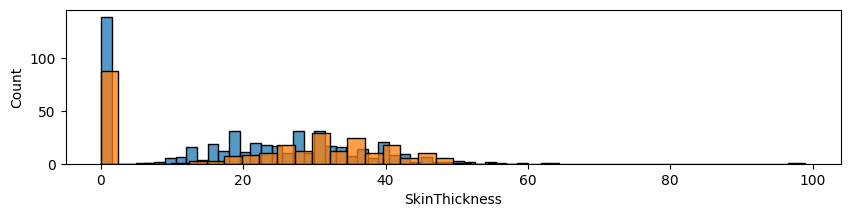

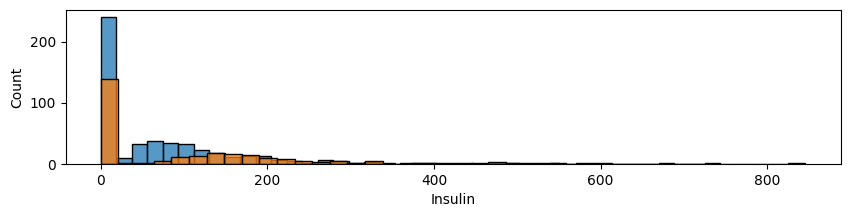

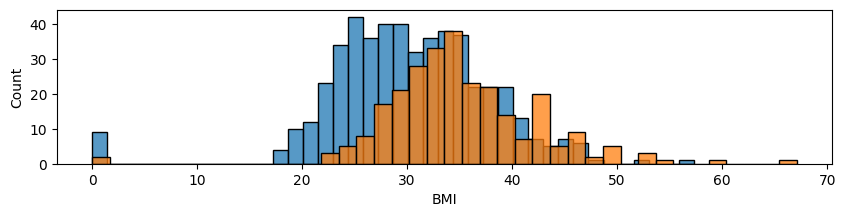

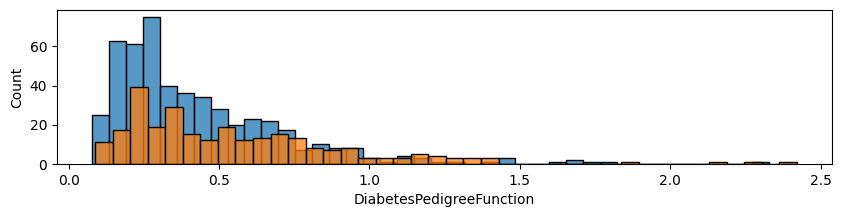

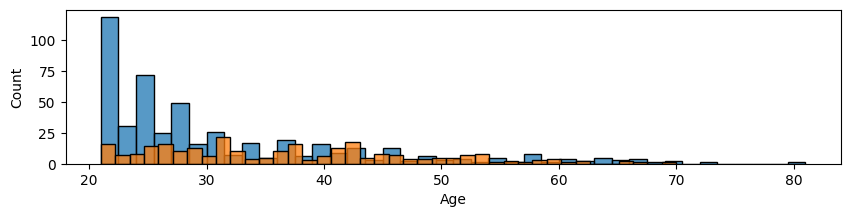

In [5]:
import seaborn as sns

dot_size = 10
for col in dataset.drop("Outcome", axis=1).columns:
    plt.figure(figsize=(10, 2))
    sns.histplot(x=negative[col], bins=40)
    sns.histplot(x=positive[col], bins=40)
    plt.show()

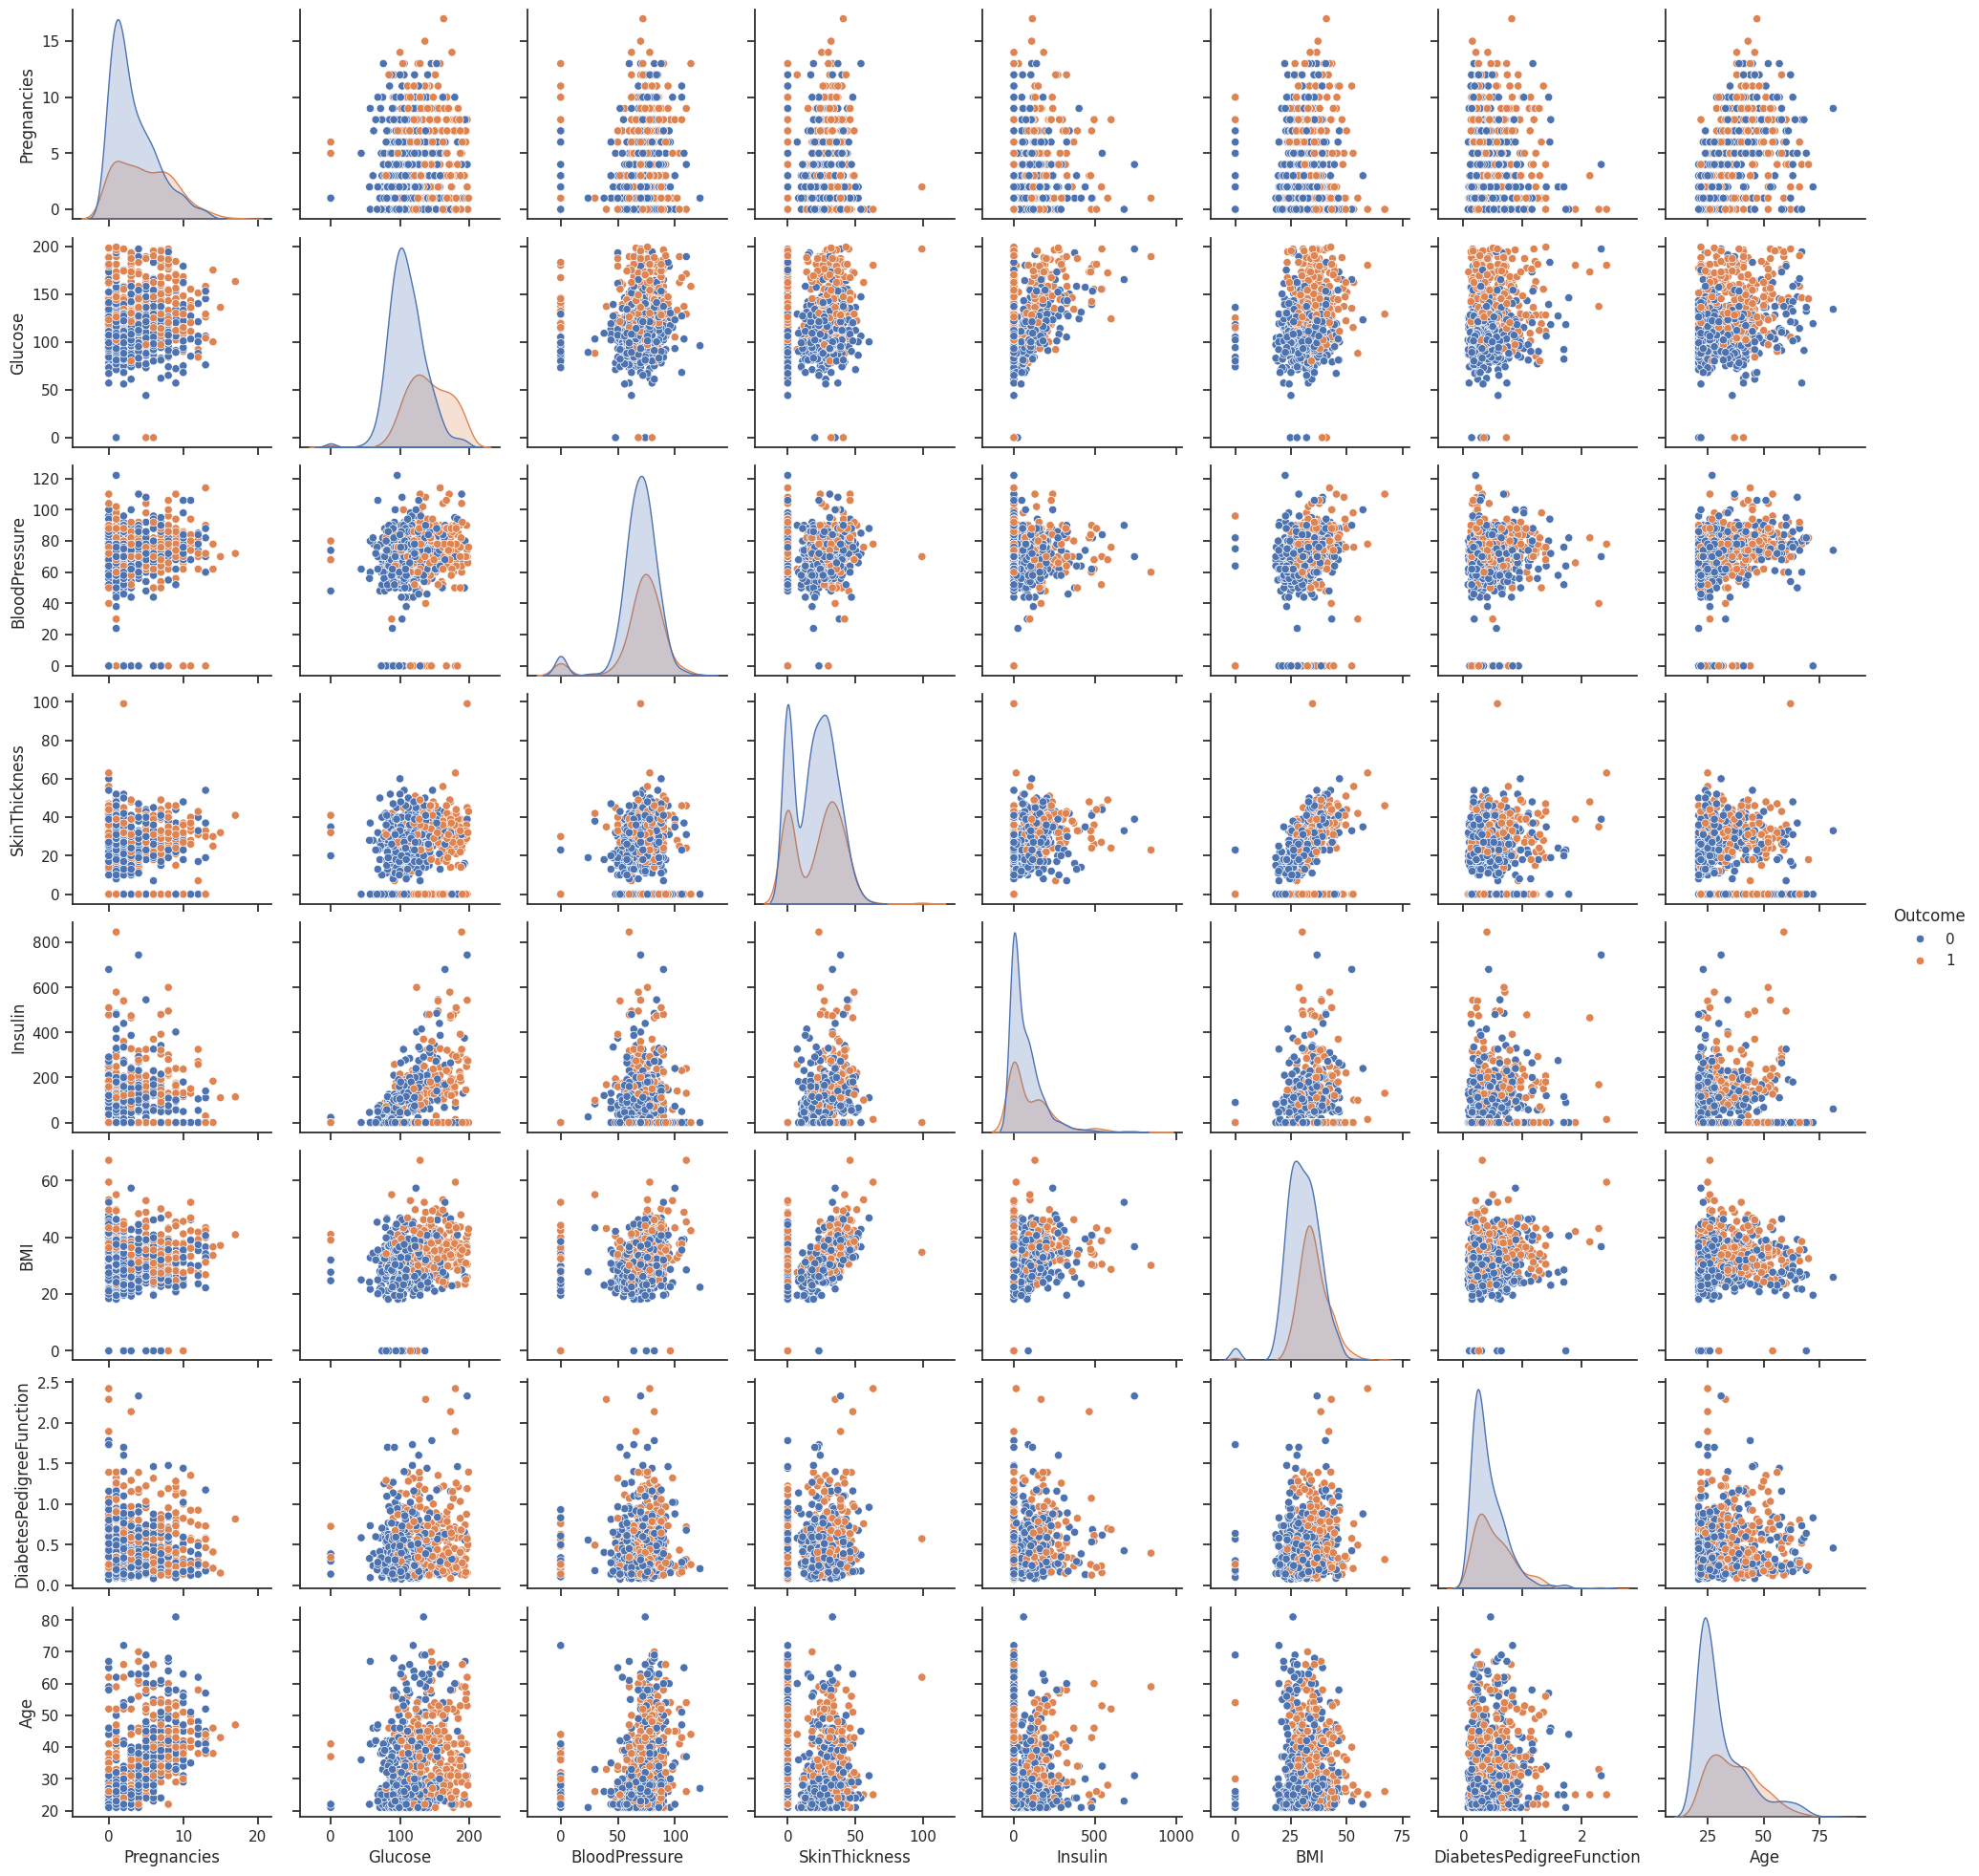

In [6]:
import seaborn as sns
sns.set_theme(style="ticks")
# sns.set_theme()

sns.pairplot(dataset, hue="Outcome")

In [7]:
# drop_features = ["BloodPressure"]
drop_features = []
Y = dataset["Outcome"]
X = dataset.drop(drop_features + ["Outcome"], axis=1)
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [8]:
dataset.apply(lambda x:(x.min(), x.max()), axis=0)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,0,0,0,0,0.0,0.078,21,0
1,17,199,122,99,846,67.1,2.420,81,1


In [9]:
def normalize_column(s:pd.Series)->pd.Series:
    return (s - s.min()) / (s.max() - s.min())


normalized_X = X.apply(normalize_column, axis=0)
normalized_X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,0.483333
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000
...,...,...,...,...,...,...,...,...
763,0.588235,0.507538,0.622951,0.484848,0.212766,0.490313,0.039710,0.700000
764,0.117647,0.613065,0.573770,0.272727,0.000000,0.548435,0.111870,0.100000
765,0.294118,0.608040,0.590164,0.232323,0.132388,0.390462,0.071307,0.150000
766,0.058824,0.633166,0.491803,0.000000,0.000000,0.448584,0.115713,0.433333


In [10]:
positive

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
2,8,183,64,0,0,23.3,0.672,32,1
4,0,137,40,35,168,43.1,2.288,33,1
6,3,78,50,32,88,31.0,0.248,26,1
8,2,197,70,45,543,30.5,0.158,53,1
...,...,...,...,...,...,...,...,...,...
755,1,128,88,39,110,36.5,1.057,37,1
757,0,123,72,0,0,36.3,0.258,52,1
759,6,190,92,0,0,35.5,0.278,66,1
761,9,170,74,31,0,44.0,0.403,43,1


In [11]:
def std_column(s:pd.Series)->pd.Series:
    return (s - s.mean()) / s.std()

std_X = X.apply(std_column, axis=0)
std_X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639530,0.847771,0.149543,0.906679,-0.692439,0.203880,0.468187,1.425067
1,-0.844335,-1.122665,-0.160441,0.530556,-0.692439,-0.683976,-0.364823,-0.190548
2,1.233077,1.942458,-0.263769,-1.287373,-0.692439,-1.102537,0.604004,-0.105515
3,-0.844335,-0.997558,-0.160441,0.154433,0.123221,-0.493721,-0.920163,-1.040871
4,-1.141108,0.503727,-1.503707,0.906679,0.765337,1.408828,5.481337,-0.020483
...,...,...,...,...,...,...,...,...
763,1.826623,-0.622237,0.356200,1.721613,0.869464,0.115094,-0.908090,2.530487
764,-0.547562,0.034575,0.046215,0.405181,-0.692439,0.609757,-0.398023,-0.530677
765,0.342757,0.003299,0.149543,0.154433,0.279412,-0.734711,-0.684747,-0.275580
766,-0.844335,0.159683,-0.470426,-1.287373,-0.692439,-0.240048,-0.370859,1.169970


dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


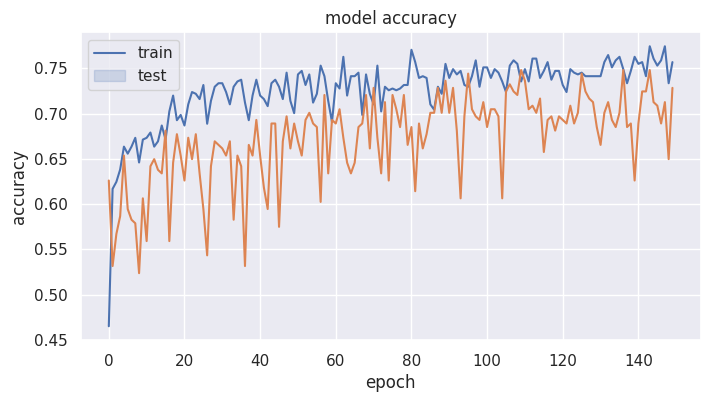

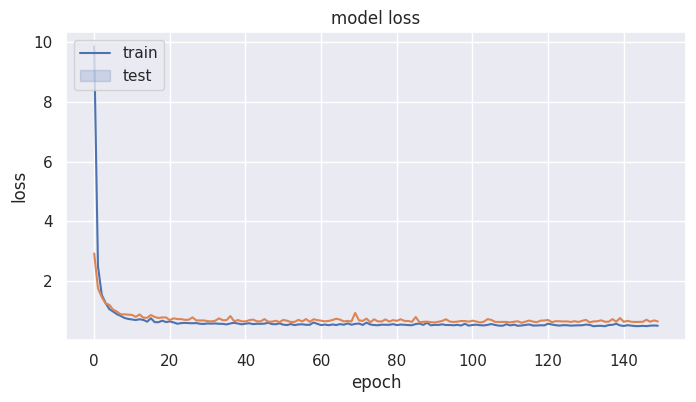

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 870us/step - accuracy: 0.7591 - loss: 0.5074
Accuracy: 75.13 0.541238
dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


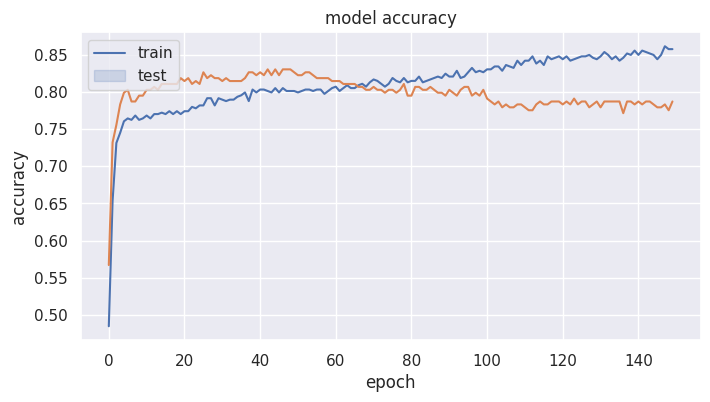

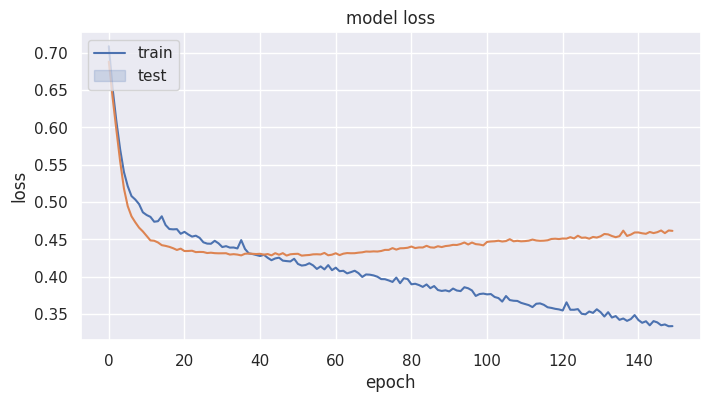

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 776us/step - accuracy: 0.8539 - loss: 0.3564
Accuracy: 83.85 0.372811
dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


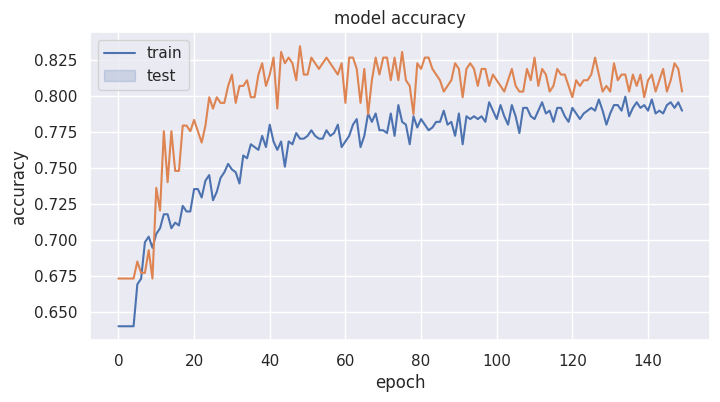

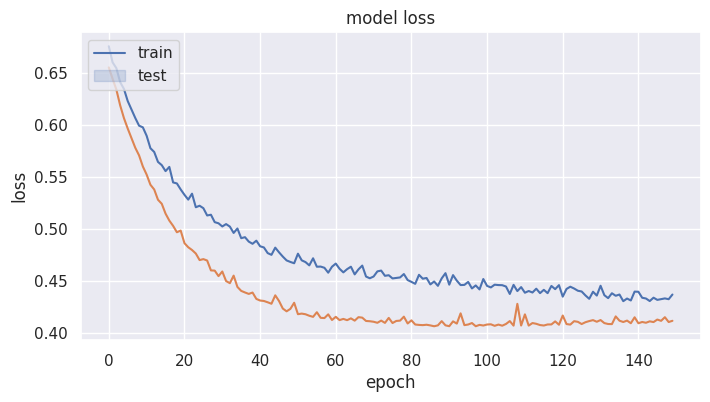

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 749us/step - accuracy: 0.7911 - loss: 0.4449
Accuracy: 79.82 0.423975


In [12]:
import seaborn as sns
sns.set_theme()

models = []
for x in [X, std_X, normalized_X]:

    # define the keras model
    model = Sequential()
    model.add(Dense(14, activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    # compile the keras model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    # fit the keras model on the dataset
    history = model.fit(x, Y, validation_split=0.33, epochs=150, batch_size=10, verbose=0)
    print(history.history.keys())
    # summarize history for accuracy
    plt.figure(figsize=(8, 4))
    sns.lineplot(history.history['accuracy'])
    sns.lineplot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    
    # summarize history for loss
    plt.figure(figsize=(8, 4))
    sns.lineplot(history.history['loss'])
    sns.lineplot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

    # evaluate the keras model
    lost, accuracy = model.evaluate(x, Y)
    print('Accuracy: %.2f %f' % (accuracy*100, lost))
    
    models.append((model, accuracy))

In [13]:
import random

indexes = list(range(len(dataset)))
random.shuffle(indexes)

# make class predictions with the model
for idx in range(len(models)):
    model = models[idx][0]
    predictions = (model.predict(X) > 0.5).astype(int)
    # summarize the first 5 cases
    print(f"model #{idx}, acc={models[idx][1] * 100}")
    for i in indexes[:10]:
        print('[%d] %s => %d (expected %d)' % (i, X.iloc[i].tolist(), predictions[i], Y[i]))

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 809us/step
model #0, acc=75.13020634651184
[173] [1.0, 79.0, 60.0, 42.0, 48.0, 43.5, 0.678, 23.0] => 0 (expected 0)
[71] [5.0, 139.0, 64.0, 35.0, 140.0, 28.6, 0.411, 26.0] => 1 (expected 0)
[631] [0.0, 102.0, 78.0, 40.0, 90.0, 34.5, 0.238, 24.0] => 0 (expected 0)
[560] [6.0, 125.0, 76.0, 0.0, 0.0, 33.8, 0.121, 54.0] => 0 (expected 1)
[749] [6.0, 162.0, 62.0, 0.0, 0.0, 24.3, 0.178, 50.0] => 1 (expected 1)
[59] [0.0, 105.0, 64.0, 41.0, 142.0, 41.5, 0.173, 22.0] => 0 (expected 0)
[409] [1.0, 172.0, 68.0, 49.0, 579.0, 42.4, 0.702, 28.0] => 0 (expected 1)
[733] [2.0, 106.0, 56.0, 27.0, 165.0, 29.0, 0.426, 22.0] => 0 (expected 0)
[174] [2.0, 75.0, 64.0, 24.0, 55.0, 29.7, 0.37, 33.0] => 0 (expected 0)
[410] [6.0, 102.0, 90.0, 39.0, 0.0, 35.7, 0.674, 28.0] => 0 (expected 0)
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 692us/step
model #1, acc=83.85416865348816
[173] [1.0, 79.0, 60.0, 42.0, 48.0, 43.5, 0.678, 23.0] => 1 (expected 0)
[71] [5.0, 139.0, 64.0, 35.0, 140.0, 28.6, 0.41

/tmp/ipykernel_1788567/3765709850.py:13: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('[%d] %s => %d (expected %d)' % (i, X.iloc[i].tolist(), predictions[i], Y[i]))
/tmp/ipykernel_1788567/3765709850.py:13: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('[%d] %s => %d (expected %d)' % (i, X.iloc[i].tolist(), predictions[i], Y[i]))
/tmp/ipykernel_1788567/3765709850.py:13: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('[%d] %s => %d (expected %d)' % 